In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn import datasets
import math
from numpy.linalg import inv

### Plot Data

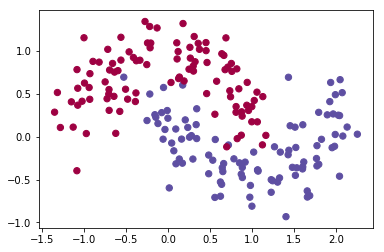

In [2]:
%matplotlib inline

np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
X=np.insert(X, 0, values=1.0, axis=1)

In [4]:
m = X.shape[0]
n = X.shape[1]
W =  np.random.randn(n)
print(W)

[-0.68417537  0.58308427  0.22231612]


### Logistic function 

$$g(x^{(i)},W) = \frac{1}{1+e^{-W^T x^{(i)}}}$$

In [5]:
def g(x,W):
    return 1/(1+np.exp(-np.inner(x , W)))

### Loss function 

Maximize the likelehood 

$$L(W) = p(y|X;W)$$

Assuming the points are iid then 

$$L(W) = \prod^m_{i=1} p(y^{(i)}|x^{(i)};W)$$

By sampling the labels as bernoulli distribution 

$$L(W) = \prod^m_{i=1} g(x^{(i)},W)^{y^{(i)}} (1-g(x^{(i)},W) )^{1-y^{(i)}}$$

Take log of the likelihood 

$$l(W) = -\sum^m_{i=1} {y^{(i)}} \log g(x^{(i)},W) + (1-y^{(i)})\log (1-g(x^{(i)},W) )$$

Differentiate with respect to W to get 

$$\frac{\partial l }{\partial W} = - \sum_{i=1}^m  x^{(i)} \left(y^{(i)}-g(x^{(i)},W)\right)$$


In [23]:
def loss(X,y,W):
    m = X.shape[0]
    logistic = 0 
    for i in range(0,m):
        logistic += y[i]*np.log(g(X[i],W))+(1-y[i])*np.log(1-g(X[i],W))
    return -logistic

In [24]:
print (loss(X,y,W))

126.051010719


In [9]:
def gradient(X,y,W):
    m = X.shape[0]
    dW = np.zeros(W.shape)
    for i in range(0,m):
        dW += X[i]*(g(X[i],W)-y[i])
    return dW

In [10]:
gradient(X,y,W)

array([-16.10721751, -38.86900033,  31.22666813])

In [40]:
def train(X,y,W , lr = 1e-3 , itr = 1200):
    for i in range(0,itr):
        W = W - lr * gradient(X,y,W)
        if(i%100 == 0):
            print(loss(X,y,W))
    return W

In [41]:
What = train(X,y,W)

123.370486878
74.2619514496
66.7555103997
63.6181152221
62.0573740612
61.2078115388
60.7158621109
60.417982657
60.2315824016
60.112022337
60.0338692635
59.9820242738


In [47]:
def predict(X, W , thresh = 0.5):
    m = X.shape[0]
    predicted = np.zeros(m)
    for i in range(0,m):
        prob = g(X[i],W)
        lbl = 0 
        if(prob > thresh):
            lbl = 1
        predicted[i] = lbl 
    return predicted

In [48]:
def accuracy(yhat , y):
    diff = y-yhat 
    num_corr  = len(y) - np.count_nonzero(diff)
    print("Accuracy is " , float(num_corr)/len(y))
    

In [49]:
yhat = predict(X, What)
accuracy(yhat , y)

Accuracy is  0.855


In [50]:
%matplotlib inline
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    inp = np.c_[xx.ravel(), yy.ravel()]
    inp = np.insert(inp, 0, values=1.0, axis=1)
    # Predict the function value for the whole gid
    Z = pred_func(inp)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)

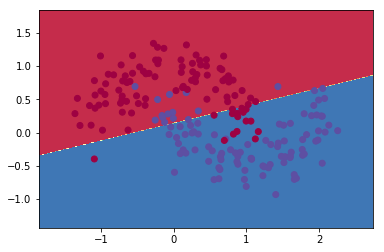

In [51]:
plot_decision_boundary(lambda x: predict(x,What))